In [ ]:
 import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
file_path = 'stars.csv'

df = pd.read_csv(file_path)
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


In [ ]:
df.info() #สำรวจข้อมูล เตรียมข้อมูลด้วยการทำความสะอาดข้อมูลและการแปลงข้อมูล

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.3+ KB


In [ ]:
df.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [ ]:
df.isnull() .sum()

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64

In [ ]:
df.duplicated() .any()

False

In [ ]:
df.rename(columns={'Temperature (K)': 'temp',
                   'Luminosity(L/Lo)': 'lum',
                   'Radius(R/Ro)': 'radius',
                   'Absolute magnitude(Mv)': 'AbsMag',
                   'Star type': 'StarType',
                   'Star color': 'color',
                   'Spectral Class': 'Spect_class'}, inplace=True)
df.head()

,temp,lum,radius,AbsMag,StarType,color,Spect_class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [ ]:
df.StarType.value_counts()

StarType
0    40
1    40
2    40
3    40
4    40
5    40
Name: count, dtype: int64

In [ ]:
df['color'] = [data.upper().replace('-',' ').replace(' ','') for data in df['color']]
list_color = df['color'].drop_duplicates().to_list()
df['color'] = [list_color.index(data) for data in df['color']]
len(list_color)

12

In [ ]:
list_color

['RED',
 'BLUEWHITE',
 'WHITE',
 'YELLOWISHWHITE',
 'PALEYELLOWORANGE',
 'BLUE',
 'WHITISH',
 'YELLOWWHITE',
 'ORANGE',
 'WHITEYELLOW',
 'YELLOWISH',
 'ORANGERED']

In [ ]:
df.color

0      0
1      0
2      0
3      0
4      0
      ..
235    5
236    5
237    2
238    2
239    5
Name: color, Length: 240, dtype: int64

In [ ]:
df['Spect_class'] = [data.upper().replace('-',' ').replace(' ','') for data in df['Spect_class']]
list_Spect_class = df['Spect_class'].drop_duplicates().to_list()
df['Spect_class'] = [list_Spect_class.index(data) for data in df['Spect_class']]
len(list_Spect_class)

7

In [ ]:
list_Spect_class

['M', 'B', 'A', 'F', 'O', 'K', 'G']

In [ ]:
df.Spect_class

0      0
1      0
2      0
3      0
4      0
      ..
235    4
236    4
237    2
238    2
239    4
Name: Spect_class, Length: 240, dtype: int64

In [ ]:
df.columns

Index(['temp', 'lum', 'radius', 'AbsMag', 'StarType', 'color', 'Spect_class'], dtype='object')

In [ ]:
Corr = df.corr()

In [ ]:
print(Corr)

                 temp       lum    radius    AbsMag  StarType     color  \
temp         1.000000  0.393404  0.064216 -0.420261  0.411129  0.471429   
lum          0.393404  1.000000  0.526516 -0.692619  0.676845  0.284636   
radius       0.064216  0.526516  1.000000 -0.608728  0.660975 -0.059143   
AbsMag      -0.420261 -0.692619 -0.608728  1.000000 -0.955276 -0.298168   
StarType     0.411129  0.676845  0.660975 -0.955276  1.000000  0.378711   
color        0.471429  0.284636 -0.059143 -0.298168  0.378711  1.000000   
Spect_class  0.527404  0.409473  0.001467 -0.433673  0.477165  0.786399   

             Spect_class  
temp            0.527404  
lum             0.409473  
radius          0.001467  
AbsMag         -0.433673  
StarType        0.477165  
color           0.786399  
Spect_class     1.000000  


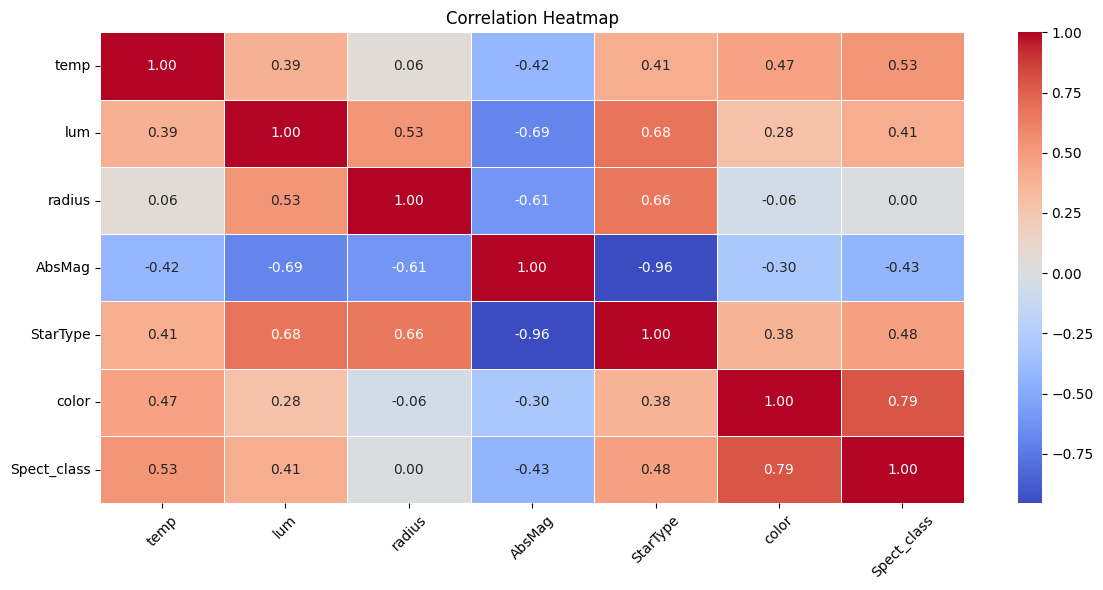

In [ ]:
#วิเคราะห์ความสัมพันธ์ของคอลัมน์
plt.figure(figsize=(12, 6))
sns.heatmap(Corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()

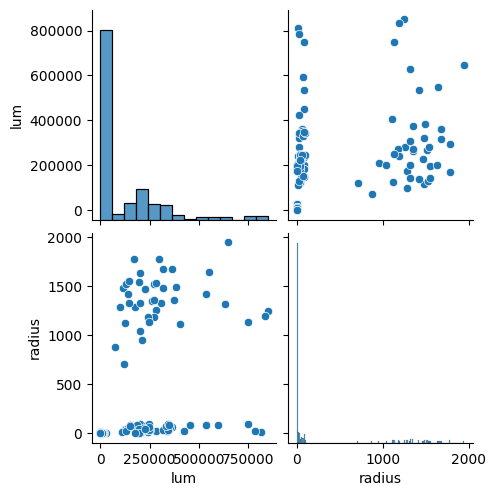

In [ ]:
#นำคอลัมน์ lum และ radius มาใช้ เนื่องจากมีผลต่อ StarType มากที่สุด
sns.pairplot(df[['lum', 'radius']])

In [ ]:
#สร้างโมเดล
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
X = df[['lum','radius']]
y=df['StarType']

fits = []
score = []
ssd=[]
for k in range (2,10):
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(X)
    fits.append(model)
    score.append(silhouette_score(X, model.labels_, metric='euclidean'))
    ssd.append([k, model.inertia_])

In [ ]:
dd=pd.DataFrame(ssd, columns=['k', 'ssd'])
dd

,k,ssd
0,2,2.508230e+12
1,3,6.476906e+11
2,4,3.161088e+11
3,5,1.794640e+11
4,6,1.015061e+11
5,7,7.007903e+10
6,8,7.498194e+10
7,9,3.983455e+10


In [ ]:
dd['pct_chg']=dd['ssd'].pct_change()*100
dd

,k,ssd,pct_chg
0,2,2.508230e+12,NaN
1,3,6.476906e+11,-74.177390
2,4,3.161088e+11,-51.194478
3,5,1.794640e+11,-43.227123
4,6,1.015061e+11,-43.439297
5,7,7.007903e+10,-30.960789
6,8,7.498194e+10,6.996259
7,9,3.983455e+10,-46.874466


<Axes: xlabel='lum', ylabel='radius'>

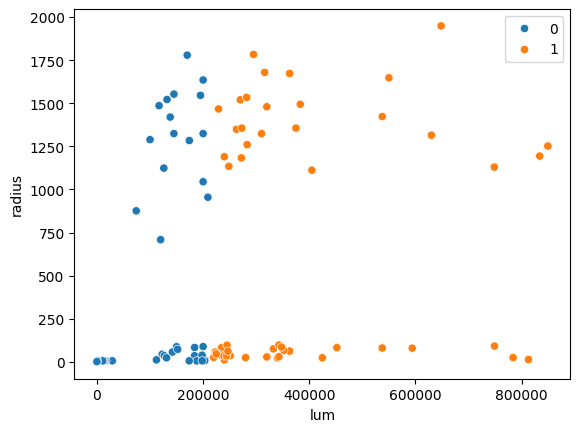

In [ ]:
#แสดงกราฟดูการจัดกลุ่มของข้อมูล
sns.scatterplot(data = X, x = 'lum', y = 'radius', hue = fits[0].labels_)

<Axes: xlabel='lum', ylabel='radius'>

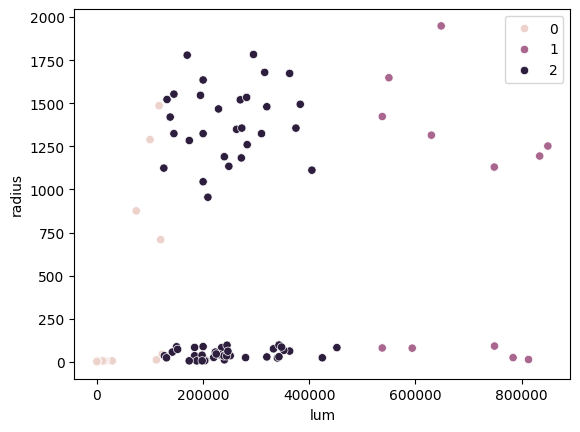

In [ ]:
sns.scatterplot(data = X, x = 'lum', y = 'radius', hue = fits[1].labels_)

<Axes: xlabel='lum', ylabel='radius'>

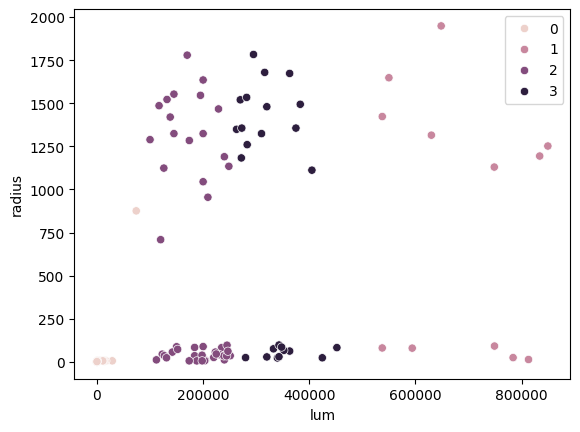

In [ ]:
sns.scatterplot(data = X, x = 'lum', y = 'radius', hue = fits[2].labels_)

<Axes: xlabel='lum', ylabel='radius'>

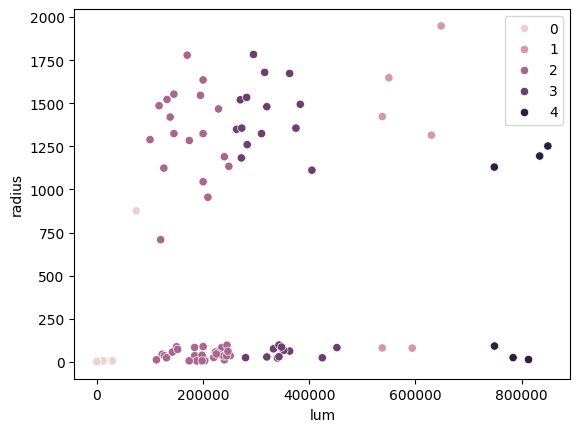

In [ ]:
sns.scatterplot(data = X, x = 'lum', y = 'radius', hue = fits[3].labels_)

<Axes: xlabel='lum', ylabel='radius'>

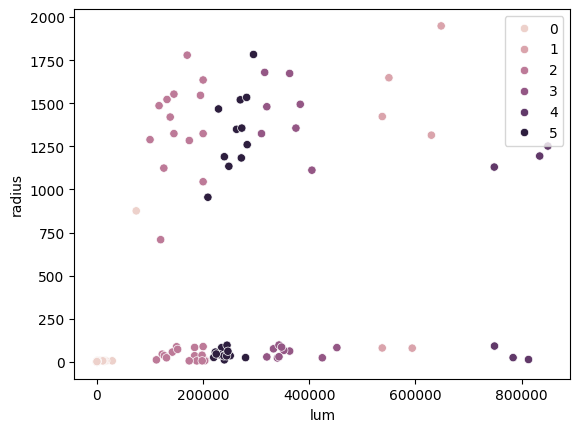

In [ ]:
sns.scatterplot(data = X, x = 'lum', y = 'radius', hue = fits[4].labels_)

<Axes: xlabel='lum', ylabel='radius'>

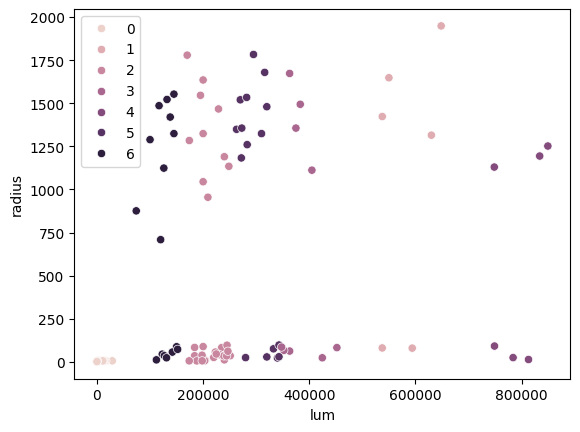

In [ ]:
sns.scatterplot(data = X, x = 'lum', y = 'radius', hue = fits[5].labels_)

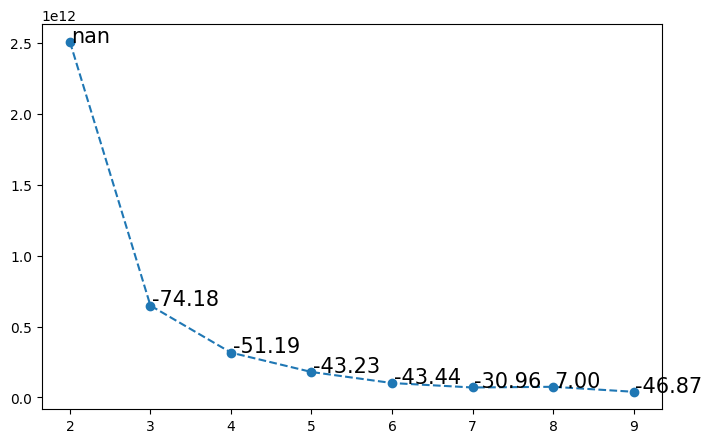

In [ ]:
#กราฟแสดง optimal point เพื่อวิเคราะห์ค่า k ที่เหมาะสม
plt.figure(figsize=(8, 5))
plt.plot(dd['k'], dd['ssd'], linestyle='--', marker='o')

for index, row in dd.iterrows():
    plt.text(row['k'] + 0.02, row['ssd'] + 0.02, f"{row['pct_chg']:.2f}", fontsize=15)